In [121]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [145]:
cancer=datasets.load_breast_cancer()
X=cancer.data
y=cancer.target

trainX,testX,trainY,testY=train_test_split(X[:,:2],y)

# 1. 自己的实现方法

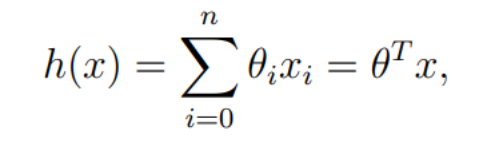

In [146]:
# define h(x)
def h(Theta, X):
    # Theta: weights
    return np.dot(X, Theta.T)

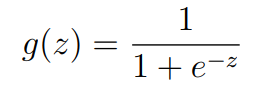

In [147]:
def sigmoid(z):
  y = 1.0/(1+np.exp(-z)) # 1.0/(1+np.exp(-z))
  return y

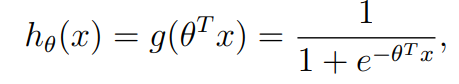

In [148]:
def h_theta(Theta, X):
  yy = sigmoid(h(Theta, X))
  return yy

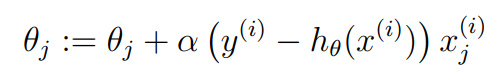

In [149]:
def gradient_ascent(Theta, x, y, lr, iterations):
 # cost = np.zeros(iterations)
  m = trainX.shape[0]
  for i in range(iterations):
    error =  y - h_theta(Theta, x)
    for j in range(len(Theta)):
      Theta[j] = Theta[j] + lr*np.dot(error, trainX[:, j]) # (1.0/m)*
     # cost[i] = J(Theta, trainX, trainY) 
  return Theta# , cost

In [150]:
Theta = np.zeros(trainX.shape[1])

In [151]:
Theta = gradient_ascent(Theta, trainX, trainY, 0.0001, 1000)

In [152]:
Theta

array([-0.91553814,  0.52328432])

# 2. 网上其他的实现方法

In [154]:
#sigmoid函数(类阶跃函数，只是0>1斜率较缓，不是瞬变的)
def sigmoid(z):
    return 1.0/(1+np.exp(-z)) # z=w*x

def gradAscent(dataMat,labelMat,numIter=150):
    dataMatrix=np.mat(dataMat) #样本特征矩阵 (m,n)
    labelMatrix=np.mat(labelMat).transpose() #样本类别矩阵 (1,m)
    m,n=np.shape(dataMatrix) #m个样本，n个特征
    
    alpha=0.001 #梯度上升的步长
    weights=np.ones((n,1)) #初始化回归系数
    
    #开始迭代，梯度上升
    for i in range(numIter):
        #将各样本值带入F(X)=sigmoid(w*x)函数计算F(X)，认为是样本在当前迭代的分类值
        Fx=sigmoid(dataMatrix*weights) #shape=(1,m)
        
        #计算各训练样本的分类误差error(样本的真实分类值-样本的F(X))
        #需要将label矩阵浮点数化，与Fx元素数值类型一致，否则报错
        """这里可以加一个if判断，用于在error小于设定值时停止迭代"""
        error=(labelMatrix.astype(float)-Fx) #shape=(1,m) 
        
        #本次迭代的梯度=dataMat'*error,意思为m个样本的n个特征 分别与 m个样本的误差相乘
        """样本误差越大，下一次迭代调整就越多"""
        grad=dataMatrix.transpose()*error #shape=(n,1),用于将回归系数向似然函数增大的方向调整
        
        #将回归系数w向似然函数增大的方向调整：w(k+1)=w(k)+a*dataMat'*error
        weights=weights+alpha*grad
  
    #直到迭代达到指定次数或error小于某值，停止迭代，得到回归系数w，逻辑斯蒂回归模型训练完毕
    return weights
# ————————————————
# 版权声明：本文为CSDN博主「Sudden|nebbuS」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
# 原文链接：https://blog.csdn.net/sudden2012/article/details/82810748

In [155]:
gradAscent(trainX, trainY)

matrix([[-6.54176002],
        [ 8.46103245]])

# 3. Sklearn实现

In [156]:
from sklearn.linear_model import LogisticRegression

In [172]:
logisticRegr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                                  class_weight=None, random_state=None, solver='lbfgs', max_iter=1000, 
                                  multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [173]:
logisticRegr.fit(trainX, trainY)

LogisticRegression(max_iter=1000)

In [174]:
logisticRegr.coef_

array([[-1.09412318, -0.22811013]])